In [337]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the Census Data
from census import Census

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [192]:
education_data = (r"C:\Users\sym0002\EdX_Bootcamp\Project1\combined_df.csv")

# Read in the data
education_data_df = pd.read_csv(education_data)
education_data_df

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty,No Education,High School Education,GED,Associates,...,poverty_family_married,Single Male,Single Female,poverty_female,poverty_male,poverty_family,state,Zipcode,Year,Poverty Rate
0,ZCTA5 00601,13092.0,17242.0,40.5,6999.0,10772.0,492.0,2868.0,160.0,888.0,...,1223.0,215.0,988.0,5905.0,4867.0,2426.0,72.0,601,2018,62.475351
1,ZCTA5 00602,16358.0,38442.0,42.3,9277.0,19611.0,901.0,5751.0,947.0,3387.0,...,2360.0,502.0,1665.0,10077.0,9534.0,4527.0,72.0,602,2018,51.014515
2,ZCTA5 00603,16603.0,48814.0,41.1,11307.0,24337.0,924.0,8745.0,996.0,2370.0,...,2393.0,697.0,3349.0,13467.0,10870.0,6439.0,72.0,603,2018,49.856599
3,ZCTA5 00606,12832.0,6437.0,43.3,5943.0,4163.0,185.0,1284.0,138.0,241.0,...,421.0,109.0,251.0,2110.0,2053.0,781.0,72.0,606,2018,64.672984
4,ZCTA5 00610,19309.0,27073.0,42.1,10220.0,11724.0,643.0,4945.0,624.0,2241.0,...,1307.0,278.0,1029.0,6074.0,5650.0,2614.0,72.0,610,2018,43.305138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166903,ZCTA5 99923,-666666666.0,25.0,-666666666.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99923,2022,0.000000
166904,ZCTA5 99925,80313.0,920.0,43.0,36414.0,143.0,0.0,191.0,63.0,53.0,...,4.0,1.0,15.0,56.0,87.0,20.0,NaN,99925,2022,15.543478
166905,ZCTA5 99926,78365.0,1465.0,37.9,29100.0,222.0,0.0,299.0,67.0,125.0,...,26.0,6.0,8.0,82.0,140.0,40.0,NaN,99926,2022,15.153584
166906,ZCTA5 99927,-666666666.0,14.0,-666666666.0,NaN,0.0,0.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99927,2022,0.000000


In [193]:
selected_columns = ['Year', 'Median Age', 'Household Income', 'No Education', 'High School Education', 'GED', 'Associates', 'Bachelors', 'Masters', 'Professional', 'Doctorate']

# Creating a new DataFrame with only the slected columns
selected_data = education_data_df[selected_columns]

# Print the resulting DataFrame
selected_data

,Year,Median Age,Household Income,No Education,High School Education,GED,Associates,Bachelors,Masters,Professional,Doctorate
0,2018,40.5,13092.0,492.0,2868.0,160.0,888.0,1781.0,216.0,15.0,79.0
1,2018,42.3,16358.0,901.0,5751.0,947.0,3387.0,3692.0,1119.0,201.0,312.0
2,2018,41.1,16603.0,924.0,8745.0,996.0,2370.0,5888.0,1437.0,297.0,280.0
3,2018,43.3,12832.0,185.0,1284.0,138.0,241.0,311.0,120.0,0.0,0.0
4,2018,42.1,19309.0,643.0,4945.0,624.0,2241.0,2498.0,749.0,54.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...
166903,2022,-666666666.0,-666666666.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0
166904,2022,43.0,80313.0,0.0,191.0,63.0,53.0,86.0,28.0,0.0,0.0
166905,2022,37.9,78365.0,0.0,299.0,67.0,125.0,43.0,40.0,3.0,4.0
166906,2022,-666666666.0,-666666666.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
selected_data_clean = selected_data.dropna()
selected_data_clean.head()

,Year,Median Age,Household Income,No Education,High School Education,GED,Associates,Bachelors,Masters,Professional,Doctorate
0,2018,40.5,13092.0,492.0,2868.0,160.0,888.0,1781.0,216.0,15.0,79.0
1,2018,42.3,16358.0,901.0,5751.0,947.0,3387.0,3692.0,1119.0,201.0,312.0
2,2018,41.1,16603.0,924.0,8745.0,996.0,2370.0,5888.0,1437.0,297.0,280.0
3,2018,43.3,12832.0,185.0,1284.0,138.0,241.0,311.0,120.0,0.0,0.0
4,2018,42.1,19309.0,643.0,4945.0,624.0,2241.0,2498.0,749.0,54.0,66.0


In [195]:
selected_data_clean = selected_data_clean[selected_data_clean['Household Income'] != -666666666]

In [196]:
selected_data_clean = selected_data_clean[selected_data_clean['Median Age'] != -666666666]

In [197]:
selected_data_clean

,Year,Median Age,Household Income,No Education,High School Education,GED,Associates,Bachelors,Masters,Professional,Doctorate
0,2018,40.5,13092.0,492.0,2868.0,160.0,888.0,1781.0,216.0,15.0,79.0
1,2018,42.3,16358.0,901.0,5751.0,947.0,3387.0,3692.0,1119.0,201.0,312.0
2,2018,41.1,16603.0,924.0,8745.0,996.0,2370.0,5888.0,1437.0,297.0,280.0
3,2018,43.3,12832.0,185.0,1284.0,138.0,241.0,311.0,120.0,0.0,0.0
4,2018,42.1,19309.0,643.0,4945.0,624.0,2241.0,2498.0,749.0,54.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...
166901,2022,46.8,59219.0,0.0,381.0,71.0,96.0,230.0,119.0,4.0,2.0
166902,2022,39.0,53125.0,0.0,94.0,23.0,9.0,17.0,15.0,0.0,0.0
166904,2022,43.0,80313.0,0.0,191.0,63.0,53.0,86.0,28.0,0.0,0.0
166905,2022,37.9,78365.0,0.0,299.0,67.0,125.0,43.0,40.0,3.0,4.0


In [198]:
desired_years = range(2018, 2023)
no_education_average = []

for year in desired_years:
    average_no_education_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['No Education'].mean()
    rounded_average_no_education = "{:.2f}".format(average_no_education_for_year)
    no_education_average.append((rounded_average_no_education))
    print(f'Average of citizens with No Education for {year}: {rounded_average_no_education}')

Average of citizens with No Education for 2018: 104.20
Average of citizens with No Education for 2019: 105.89
Average of citizens with No Education for 2020: 114.81
Average of citizens with No Education for 2021: 122.26
Average of citizens with No Education for 2022: 131.03


In [199]:
no_education_average

['104.20', '105.89', '114.81', '122.26', '131.03']

In [258]:
desired_years = range(2018, 2023)
no_education_sum = []

for year in desired_years:
    sum_no_education_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['No Education'].sum()
    rounded_sum_no_education = int(sum_no_education_for_year)
    formatted_sum_no_education = '{:,.0f}'.format(rounded_sum_no_education)
    no_education_sum.append((formatted_sum_no_education))
    print(f'The total of citizens with No Education for {year}: {formatted_sum_no_education}')

The total of citizens with No Education for 2018: 3,218,903
The total of citizens with No Education for 2019: 3,263,491
The total of citizens with No Education for 2020: 3,509,101
The total of citizens with No Education for 2021: 3,748,477
The total of citizens with No Education for 2022: 4,012,300


In [259]:
no_education_sum

['3,218,903', '3,263,491', '3,509,101', '3,748,477', '4,012,300']

In [202]:
desired_years = range(2018, 2023)
high_school_education_average = []

for year in desired_years:
    average_high_school_education_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['High School Education'].mean()
    rounded_average_high_school_education = "{:.2f}".format(average_high_school_education_for_year)
    high_school_education_average.append((rounded_average_high_school_education))
    print(f'Average of citizens with their highest level of education being High School Education for {year}: {rounded_average_high_school_education}')

Average of citizens with their highest level of education being High School Education for 2018: 1654.80
Average of citizens with their highest level of education being High School Education for 2019: 1662.71
Average of citizens with their highest level of education being High School Education for 2020: 1672.03
Average of citizens with their highest level of education being High School Education for 2021: 1671.36
Average of citizens with their highest level of education being High School Education for 2022: 1674.86


In [203]:
high_school_education_average

['1654.80', '1662.71', '1672.03', '1671.36', '1674.86']

In [263]:
desired_years = range(2018, 2023)
high_school_education_sum = []

for year in desired_years:
    sum_high_school_education_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['High School Education'].sum()
    rounded_sum_high_school_education = int(sum_high_school_education_for_year)
    formatted_sum_high_school_education = '{:,.0f}'.format(rounded_sum_high_school_education)
    high_school_education_sum.append((formatted_sum_high_school_education))
    print(f'The total of citizens with their highest level of education being High School Education for {year}: {formatted_sum_high_school_education}')

The total of citizens with their highest level of education being High School Education for 2018: 51,118,356
The total of citizens with their highest level of education being High School Education for 2019: 51,246,276
The total of citizens with their highest level of education being High School Education for 2020: 51,103,956
The total of citizens with their highest level of education being High School Education for 2021: 51,245,522
The total of citizens with their highest level of education being High School Education for 2022: 51,286,029


In [264]:
high_school_education_sum

['51,118,356', '51,246,276', '51,103,956', '51,245,522', '51,286,029']

In [206]:
desired_years = range(2018, 2023)
ged_education_average = []

for year in desired_years:
    average_ged_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['GED'].mean()
    rounded_average_ged_education = "{:.2f}".format(average_ged_for_year)
    ged_education_average.append((rounded_average_ged_education))
    print(f'Average of citizens with their highest level of education being GED for {year}: {rounded_average_ged_education}')

Average of citizens with their highest level of education being GED for 2018: 281.04
Average of citizens with their highest level of education being GED for 2019: 284.11
Average of citizens with their highest level of education being GED for 2020: 288.54
Average of citizens with their highest level of education being GED for 2021: 289.43
Average of citizens with their highest level of education being GED for 2022: 291.77


In [207]:
ged_education_average

['281.04', '284.11', '288.54', '289.43', '291.77']

In [265]:
desired_years = range(2018, 2023)
ged_education_sum = []

for year in desired_years:
    sum_ged_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['GED'].sum()
    rounded_sum_ged_education = int(sum_ged_for_year)
    formatted_sum_ged_education = '{:,.0f}'.format(rounded_sum_ged_education)
    ged_education_sum.append((formatted_sum_ged_education))
    print(f'The total of citizens with their highest level of education being GED for {year}: {formatted_sum_ged_education}')

The total of citizens with their highest level of education being GED for 2018: 8,681,535
The total of citizens with their highest level of education being GED for 2019: 8,756,561
The total of citizens with their highest level of education being GED for 2020: 8,818,922
The total of citizens with their highest level of education being GED for 2021: 8,874,132
The total of citizens with their highest level of education being GED for 2022: 8,934,288


In [266]:
ged_education_sum

['8,681,535', '8,756,561', '8,818,922', '8,874,132', '8,934,288']

In [210]:
desired_years = range(2018, 2023)
associates_education_average = []

for year in desired_years:
    average_assocaties_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Associates'].mean()
    rounded_average_associates_education = "{:.2f}".format(average_assocaties_for_year)
    associates_education_average.append((rounded_average_associates_education))
    print(f'Average of citizens with their highest level of education being Associates for {year}: {rounded_average_associates_education}')

Average of citizens with their highest level of education being Associates for 2018: 600.45
Average of citizens with their highest level of education being Associates for 2019: 614.15
Average of citizens with their highest level of education being Associates for 2020: 637.05
Average of citizens with their highest level of education being Associates for 2021: 647.12
Average of citizens with their highest level of education being Associates for 2022: 654.69


In [211]:
associates_education_average

['600.45', '614.15', '637.05', '647.12', '654.69']

In [267]:
desired_years = range(2018, 2023)
associates_education_sum= []

for year in desired_years:
    sum_assocaties_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Associates'].sum()
    rounded_sum_associates_education = int(sum_assocaties_for_year)
    formatted_assocites_education = '{:,.0f}'.format(rounded_sum_associates_education)
    associates_education_sum.append((formatted_assocites_education))
    print(f'The total of citizens with their highest level of education being Associates for {year}: {formatted_assocites_education}')

The total of citizens with their highest level of education being Associates for 2018: 18,548,543
The total of citizens with their highest level of education being Associates for 2019: 18,928,565
The total of citizens with their highest level of education being Associates for 2020: 19,470,699
The total of citizens with their highest level of education being Associates for 2021: 19,841,318
The total of citizens with their highest level of education being Associates for 2022: 20,047,351


In [268]:
associates_education_sum

['18,548,543', '18,928,565', '19,470,699', '19,841,318', '20,047,351']

In [214]:
desired_years = range(2018, 2023)
bachelors_education_average = []

for year in desired_years:
    average_bachelors_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Bachelors'].mean()
    rounded_average_bachelors_education = "{:.2f}".format(average_bachelors_for_year)
    bachelors_education_average.append((rounded_average_bachelors_education))
    print(f'Average of citizens with their highest level of education being Bachelors for {year}: {rounded_average_bachelors_education}')

Average of citizens with their highest level of education being Bachelors for 2018: 1387.42
Average of citizens with their highest level of education being Bachelors for 2019: 1428.94
Average of citizens with their highest level of education being Bachelors for 2020: 1486.40
Average of citizens with their highest level of education being Bachelors for 2021: 1525.32
Average of citizens with their highest level of education being Bachelors for 2022: 1561.57


In [215]:
bachelors_education_average

['1387.42', '1428.94', '1486.40', '1525.32', '1561.57']

In [269]:
desired_years = range(2018, 2023)
bachelors_education_sum = []

for year in desired_years:
    sum_bachelors_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Bachelors'].sum()
    rounded_sum_bachelors_education = int(sum_bachelors_for_year)
    formatted_sum_bachelors_education = '{:,.0f}'.format(rounded_sum_bachelors_education)
    bachelors_education_sum.append((formatted_sum_bachelors_education))
    print(f'The total of citizens with their highest level of education being Bachelors for {year}: {formatted_sum_bachelors_education}')

The total of citizens with their highest level of education being Bachelors for 2018: 42,858,829
The total of citizens with their highest level of education being Bachelors for 2019: 44,041,261
The total of citizens with their highest level of education being Bachelors for 2020: 45,430,388
The total of citizens with their highest level of education being Bachelors for 2021: 46,767,742
The total of citizens with their highest level of education being Bachelors for 2022: 47,816,690


In [270]:
bachelors_education_sum

['42,858,829', '44,041,261', '45,430,388', '46,767,742', '47,816,690']

In [218]:
desired_years = range(2018, 2023)
masters_education_average = []

for year in desired_years:
    average_masters_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Masters'].mean()
    rounded_average_masters_education = "{:.2f}".format(average_masters_for_year)
    masters_education_average.append((rounded_average_masters_education))
    print(f'Average of citizens with their highest level of education being Masters for {year}: {rounded_average_masters_education}')

Average of citizens with their highest level of education being Masters for 2018: 612.23
Average of citizens with their highest level of education being Masters for 2019: 634.55
Average of citizens with their highest level of education being Masters for 2020: 664.51
Average of citizens with their highest level of education being Masters for 2021: 689.71
Average of citizens with their highest level of education being Masters for 2022: 711.99


In [219]:
masters_education_average

['612.23', '634.55', '664.51', '689.71', '711.99']

In [271]:
desired_years = range(2018, 2023)
masters_education_sum = []

for year in desired_years:
    sum_masters_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Masters'].sum()
    rounded_sum_masters_education = int(sum_masters_for_year)
    formatted_sum_masters_education = '{:,.0f}'.format(rounded_sum_masters_education)
    masters_education_sum.append((formatted_sum_masters_education))
    print(f'The total of citizens with their highest level of education being Masters for {year}: {formatted_sum_masters_education}')

The total of citizens with their highest level of education being Masters for 2018: 18,912,256
The total of citizens with their highest level of education being Masters for 2019: 19,557,534
The total of citizens with their highest level of education being Masters for 2020: 20,310,210
The total of citizens with their highest level of education being Masters for 2021: 21,147,071
The total of citizens with their highest level of education being Masters for 2022: 21,801,944


In [272]:
masters_education_sum

['18,912,256', '19,557,534', '20,310,210', '21,147,071', '21,801,944']

In [222]:
desired_years = range(2018, 2023)
professional_education_average = []

for year in desired_years:
    average_professional_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Professional'].mean()
    rounded_average_professional_education = "{:.2f}".format(average_professional_for_year)
    professional_education_average.append((rounded_average_professional_education))
    print(f'Average of citizens with their highest level of education being Professional for {year}: {rounded_average_professional_education}')

Average of citizens with their highest level of education being Professional for 2018: 147.74
Average of citizens with their highest level of education being Professional for 2019: 152.67
Average of citizens with their highest level of education being Professional for 2020: 159.91
Average of citizens with their highest level of education being Professional for 2021: 164.31
Average of citizens with their highest level of education being Professional for 2022: 168.05


In [223]:
professional_education_average

['147.74', '152.67', '159.91', '164.31', '168.05']

In [273]:
desired_years = range(2018, 2023)
professional_education_sum = []

for year in desired_years:
    sum_professional_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Professional'].sum()
    rounded_sum_professional_education = int(sum_professional_for_year)
    formatted_sum_professional_education = '{:,.0f}'.format(rounded_sum_professional_education)
    professional_education_sum.append((formatted_sum_professional_education))
    print(f'The total of citizens with their highest level of education being Professional for {year}: {formatted_sum_professional_education}')

The total of citizens with their highest level of education being Professional for 2018: 4,563,978
The total of citizens with their highest level of education being Professional for 2019: 4,705,549
The total of citizens with their highest level of education being Professional for 2020: 4,887,376
The total of citizens with their highest level of education being Professional for 2021: 5,037,864
The total of citizens with their highest level of education being Professional for 2022: 5,145,750


In [274]:
professional_education_sum

['4,563,978', '4,705,549', '4,887,376', '5,037,864', '5,145,750']

In [226]:
desired_years = range(2018, 2023)
doctorate_education_average = []

for year in desired_years:
    average_doctorate_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Doctorate'].mean()
    rounded_average_doctorate_education = "{:.2f}".format(average_doctorate_for_year)
    doctorate_education_average.append((rounded_average_doctorate_education))
    print(f'Average of citizens with their highest level of education being Doctorate for {year}: {rounded_average_doctorate_education}')

Average of citizens with their highest level of education being Doctorate for 2018: 99.39
Average of citizens with their highest level of education being Doctorate for 2019: 102.62
Average of citizens with their highest level of education being Doctorate for 2020: 107.06
Average of citizens with their highest level of education being Doctorate for 2021: 111.73
Average of citizens with their highest level of education being Doctorate for 2022: 116.72


In [227]:
doctorate_education_average

['99.39', '102.62', '107.06', '111.73', '116.72']

In [275]:
desired_years = range(2018, 2023)
doctorate_education_sum = []

for year in desired_years:
    sum_doctorate_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Doctorate'].sum()
    rounded_sum_doctorate_education = int(sum_doctorate_for_year)
    formatted_sum_doctorate_education = '{:,.0f}'.format(rounded_sum_doctorate_education)
    doctorate_education_sum.append((formatted_sum_doctorate_education))
    print(f'The total of citizens with their highest level of education being Doctorate for {year}: {formatted_sum_doctorate_education}')

The total of citizens with their highest level of education being Doctorate for 2018: 3,070,380
The total of citizens with their highest level of education being Doctorate for 2019: 3,162,971
The total of citizens with their highest level of education being Doctorate for 2020: 3,272,119
The total of citizens with their highest level of education being Doctorate for 2021: 3,425,639
The total of citizens with their highest level of education being Doctorate for 2022: 3,574,100


In [276]:
doctorate_education_sum

['3,070,380', '3,162,971', '3,272,119', '3,425,639', '3,574,100']

In [278]:
desired_years = range(2018, 2023)
household_income_average = []

for year in desired_years:
    average_household_income_for_year = selected_data_clean[selected_data_clean['Year'] ==year]['Household Income'].mean()
    rounded_household_income = "{:,.2f}".format(average_household_income_for_year)
    household_income_average.append((rounded_household_income))
    print(f'Average household income in {year}: {rounded_household_income}')

Average household income in 2018: 59,031.43
Average household income in 2019: 61,302.54
Average household income in 2020: 63,463.60
Average household income in 2021: 67,280.94
Average household income in 2022: 73,132.63


In [279]:
household_income_average

['59,031.43', '61,302.54', '63,463.60', '67,280.94', '73,132.63']

In [392]:
# Pull in averages
averages = {
    'average_household_income': household_income_average,
    'average_no_education': no_education_average,
    'average_high_school': high_school_education_average,
    'average_ged': ged_education_average,
    'average_associates': associates_education_average,
    'average_bachelors': bachelors_education_average,
    'average_masters': masters_education_average,
    'average_professional': professional_education_average,
    'average_doctorate': doctorate_education_average
}

# Add a 'year' column
years = [2018, 2019, 2020, 2021, 2022]
average_education = pd.DataFrame(averages, index=years)

average_education

,average_household_income,average_no_education,average_high_school,average_ged,average_associates,average_bachelors,average_masters,average_professional,average_doctorate
2018,"59,031.43",104.20,1654.80,281.04,600.45,1387.42,612.23,147.74,99.39
2019,"61,302.54",105.89,1662.71,284.11,614.15,1428.94,634.55,152.67,102.62
2020,"63,463.60",114.81,1672.03,288.54,637.05,1486.40,664.51,159.91,107.06
2021,"67,280.94",122.26,1671.36,289.43,647.12,1525.32,689.71,164.31,111.73
2022,"73,132.63",131.03,1674.86,291.77,654.69,1561.57,711.99,168.05,116.72


In [313]:
print(average_education.dtypes)

average_household_income    object
average_no_education        object
average_high_school         object
average_ged                 object
average_associates          object
average_bachelors           object
average_masters             object
average_professiobal        object
average_doctorate           object
dtype: object


In [463]:
#average_education = average_education.apply(pd.to_numeric, errors='coerce')
for column in average_education.columns:
    if average_education[column].dtype == 'object':
        average_education[column] = average_education[column].str.replace(',', '')
average_education = average_education.apply(pd.to_numeric, errors='coerce')

In [464]:
print(average_education.dtypes)

average_household_income    float64
average_no_education        float64
average_high_school         float64
average_ged                 float64
average_associates          float64
average_bachelors           float64
average_masters             float64
average_professional        float64
average_doctorate           float64
dtype: object


In [391]:
# Pull in sums
sums = {
    'average_household_income': household_income_average,
    'total_no_education': no_education_sum,
    'total_high_school': high_school_education_sum,
    'total_ged': ged_education_sum,
    'total_associates': associates_education_sum,
    'total_bachelors': bachelors_education_sum,
    'total_masters': masters_education_sum,
    'total_professional': professional_education_sum,
    'total_doctorate': doctorate_education_sum
}

# Add a 'year' column
years = [2018, 2019, 2020, 2021, 2022]
total_education = pd.DataFrame(sums, index=years)

total_education

,average_household_income,total_no_education,total_high_school,total_ged,total_associates,total_bachelors,total_masters,total_professional,total_doctorate
2018,"59,031.43","3,218,903","51,118,356","8,681,535","18,548,543","42,858,829","18,912,256","4,563,978","3,070,380"
2019,"61,302.54","3,263,491","51,246,276","8,756,561","18,928,565","44,041,261","19,557,534","4,705,549","3,162,971"
2020,"63,463.60","3,509,101","51,103,956","8,818,922","19,470,699","45,430,388","20,310,210","4,887,376","3,272,119"
2021,"67,280.94","3,748,477","51,245,522","8,874,132","19,841,318","46,767,742","21,147,071","5,037,864","3,425,639"
2022,"73,132.63","4,012,300","51,286,029","8,934,288","20,047,351","47,816,690","21,801,944","5,145,750","3,574,100"


In [353]:
print(total_education.dtypes)

average_household_income    object
total_no_education          object
total_high_school           object
total_ged                   object
total_associates            object
total_bachelors             object
total_masters               object
total_professiobal          object
total_doctorate             object
dtype: object


In [356]:
for column in total_education.columns:
    unique_values = total_education[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in average_household_income: ['59,031.43' '61,302.54' '63,463.60' '67,280.94' '73,132.63']
Unique values in total_no_education: ['3,218,903' '3,263,491' '3,509,101' '3,748,477' '4,012,300']
Unique values in total_high_school: ['51,118,356' '51,246,276' '51,103,956' '51,245,522' '51,286,029']
Unique values in total_ged: ['8,681,535' '8,756,561' '8,818,922' '8,874,132' '8,934,288']
Unique values in total_associates: ['18,548,543' '18,928,565' '19,470,699' '19,841,318' '20,047,351']
Unique values in total_bachelors: ['42,858,829' '44,041,261' '45,430,388' '46,767,742' '47,816,690']
Unique values in total_masters: ['18,912,256' '19,557,534' '20,310,210' '21,147,071' '21,801,944']
Unique values in total_professiobal: ['4,563,978' '4,705,549' '4,887,376' '5,037,864' '5,145,750']
Unique values in total_doctorate: ['3,070,380' '3,162,971' '3,272,119' '3,425,639' '3,574,100']


In [357]:
for column in total_education.columns:
    if total_education[column].dtype == 'object':
        total_education[column] = total_education[column].str.replace(',', '')
total_education = total_education.apply(pd.to_numeric, errors='coerce')

In [359]:
print(total_education.dtypes)

average_household_income    float64
total_no_education            int64
total_high_school             int64
total_ged                     int64
total_associates              int64
total_bachelors               int64
total_masters                 int64
total_professiobal            int64
total_doctorate               int64
dtype: object


In [360]:
total_education

,average_household_income,total_no_education,total_high_school,total_ged,total_associates,total_bachelors,total_masters,total_professiobal,total_doctorate
2018,59031.43,3218903,51118356,8681535,18548543,42858829,18912256,4563978,3070380
2019,61302.54,3263491,51246276,8756561,18928565,44041261,19557534,4705549,3162971
2020,63463.60,3509101,51103956,8818922,19470699,45430388,20310210,4887376,3272119
2021,67280.94,3748477,51245522,8874132,19841318,46767742,21147071,5037864,3425639
2022,73132.63,4012300,51286029,8934288,20047351,47816690,21801944,5145750,3574100


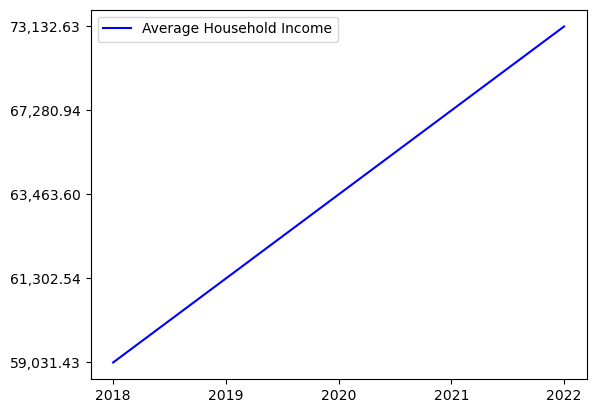

In [371]:
# Plot the average household income as a line chart
house_avg = plt.plot(years, household_income_average, color="blue", label="Average Household Income")
plt.legend()
plt.xticks(years)
plt.show()

In [483]:
# Pull in averages without average_household_income
averages2 = {
    'average_no_education': no_education_average,
    'average_high_school': high_school_education_average,
    'average_ged': ged_education_average,
    'average_associates': associates_education_average,
    'average_bachelors': bachelors_education_average,
    'average_masters': masters_education_average,
    'average_professional': professional_education_average,
    'average_doctorate': doctorate_education_average
}

# Add a 'year' column
years = [2018, 2019, 2020, 2021, 2022]
average_education_main = pd.DataFrame(averages2, index=years)

average_education_main

,average_no_education,average_high_school,average_ged,average_associates,average_bachelors,average_masters,average_professional,average_doctorate
2018,104.20,1654.80,281.04,600.45,1387.42,612.23,147.74,99.39
2019,105.89,1662.71,284.11,614.15,1428.94,634.55,152.67,102.62
2020,114.81,1672.03,288.54,637.05,1486.40,664.51,159.91,107.06
2021,122.26,1671.36,289.43,647.12,1525.32,689.71,164.31,111.73
2022,131.03,1674.86,291.77,654.69,1561.57,711.99,168.05,116.72


In [486]:
print(average_education_main.dtypes)

average_no_education    object
average_high_school     object
average_ged             object
average_associates      object
average_bachelors       object
average_masters         object
average_professional    object
average_doctorate       object
dtype: object


In [487]:
for column in average_education_main.columns:
    if average_education_main[column].dtype == 'object':
        average_education_main[column] = average_education_main[column].str.replace(',', '')
average_education_main_clean = average_education_main.apply(pd.to_numeric, errors='coerce')

In [488]:
print(average_education_main_clean.dtypes)

average_no_education    float64
average_high_school     float64
average_ged             float64
average_associates      float64
average_bachelors       float64
average_masters         float64
average_professional    float64
average_doctorate       float64
dtype: object


In [489]:
average_education_main_clean

,average_no_education,average_high_school,average_ged,average_associates,average_bachelors,average_masters,average_professional,average_doctorate
2018,104.20,1654.80,281.04,600.45,1387.42,612.23,147.74,99.39
2019,105.89,1662.71,284.11,614.15,1428.94,634.55,152.67,102.62
2020,114.81,1672.03,288.54,637.05,1486.40,664.51,159.91,107.06
2021,122.26,1671.36,289.43,647.12,1525.32,689.71,164.31,111.73
2022,131.03,1674.86,291.77,654.69,1561.57,711.99,168.05,116.72


In [427]:
# Pull in sums
sums2 = {
    'total_no_education': no_education_sum,
    'total_high_school': high_school_education_sum,
    'total_ged': ged_education_sum,
    'total_associates': associates_education_sum,
    'total_bachelors': bachelors_education_sum,
    'total_masters': masters_education_sum,
    'total_professional': professional_education_sum,
    'total_doctorate': doctorate_education_sum
}

# Add a 'year' column
years = [2018, 2019, 2020, 2021, 2022]
total_education_main = pd.DataFrame(sums2, index=years)

total_education_main

,total_no_education,total_high_school,total_ged,total_associates,total_bachelors,total_masters,total_professional,total_doctorate
2018,"3,218,903","51,118,356","8,681,535","18,548,543","42,858,829","18,912,256","4,563,978","3,070,380"
2019,"3,263,491","51,246,276","8,756,561","18,928,565","44,041,261","19,557,534","4,705,549","3,162,971"
2020,"3,509,101","51,103,956","8,818,922","19,470,699","45,430,388","20,310,210","4,887,376","3,272,119"
2021,"3,748,477","51,245,522","8,874,132","19,841,318","46,767,742","21,147,071","5,037,864","3,425,639"
2022,"4,012,300","51,286,029","8,934,288","20,047,351","47,816,690","21,801,944","5,145,750","3,574,100"


In [413]:
for column in total_education_main.columns:
    if total_education_main[column].dtype == 'object':
        total_education_main[column] = total_education_main[column].str.replace(',', '')
total_education_main_clean = total_education_main.apply(pd.to_numeric, errors='coerce')

In [400]:
print(total_education_main_clean.dtypes)

total_no_education    int64
total_high_school     int64
total_ged             int64
total_associates      int64
total_bachelors       int64
total_masters         int64
total_professional    int64
total_doctorate       int64
dtype: object


In [414]:
total_education_main_clean

,total_no_education,total_high_school,total_ged,total_associates,total_bachelors,total_masters,total_professional,total_doctorate
2018,3218903,51118356,8681535,18548543,42858829,18912256,4563978,3070380
2019,3263491,51246276,8756561,18928565,44041261,19557534,4705549,3162971
2020,3509101,51103956,8818922,19470699,45430388,20310210,4887376,3272119
2021,3748477,51245522,8874132,19841318,46767742,21147071,5037864,3425639
2022,4012300,51286029,8934288,20047351,47816690,21801944,5145750,3574100


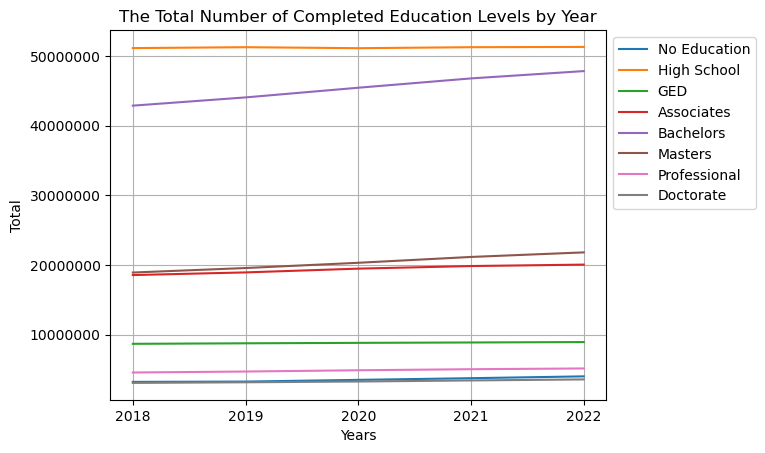

In [523]:
# Plot a line chart showing the total number of completed education levels by year
plt.plot(total_education_main_clean.index, total_education_main_clean['total_no_education'], label='No Education')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_high_school'], label='High School')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_ged'], label='GED')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_associates'], label='Associates')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_bachelors'], label='Bachelors')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_masters'], label='Masters')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_professional'], label='Professional')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_doctorate'], label='Doctorate')

# Customize the plot
plt.title('The Total Number of Completed Education Levels by Year')
plt.xlabel('Years')
plt.ylabel('Total')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.xticks(total_education_main_clean.index)
plt.show()

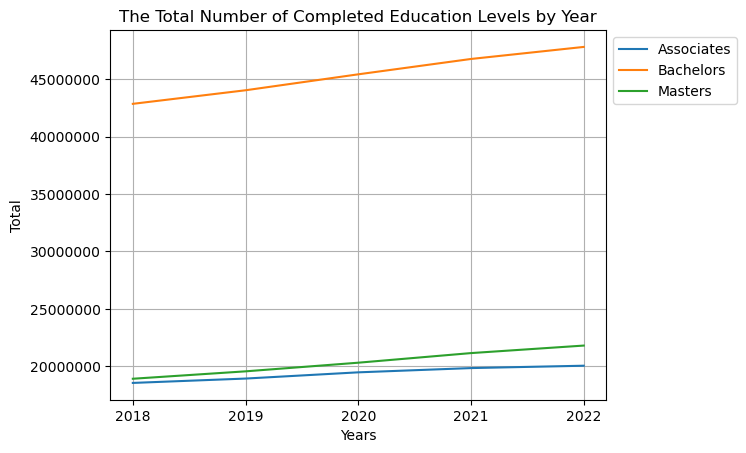

In [538]:
# Plot a line chart showing the total number of completed education levels by year
plt.plot(total_education_main_clean.index, total_education_main_clean['total_associates'], label='Associates')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_bachelors'], label='Bachelors')
plt.plot(total_education_main_clean.index, total_education_main_clean['total_masters'], label='Masters')

# Customize the plot
plt.title('The Total Number of Completed Education Levels by Year')
plt.xlabel('Years')
plt.ylabel('Total')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.xticks(total_education_main_clean.index)
#plt.show()
plt.savefig(r"C:\Users\sym0002\EdX_Bootcamp\Project1/Fig3.png")

In [515]:
#Create a DataFrame from a list of dictionaries of the increased totals for associates, bachelors, and masters degrees
increase = {
    "Associates Increased Amounts": [380022, 542134, 370619, 206033],
    "Bachelors Increased Amounts": [1382432, 1389127, 1337354, 1048948],
    "Masters Increased Amounts": [645278, 752676, 836861, 654873]
}

#Add a year column
year_range = [2019, 2020, 2021, 2022]
yearly_increase = pd.DataFrame(increase, index=year_range)

yearly_increase

,Associates Increased Amounts,Bachelors Increased Amounts,Masters Increased Amounts
2019,380022,1382432,645278
2020,542134,1389127,752676
2021,370619,1337354,836861
2022,206033,1048948,654873


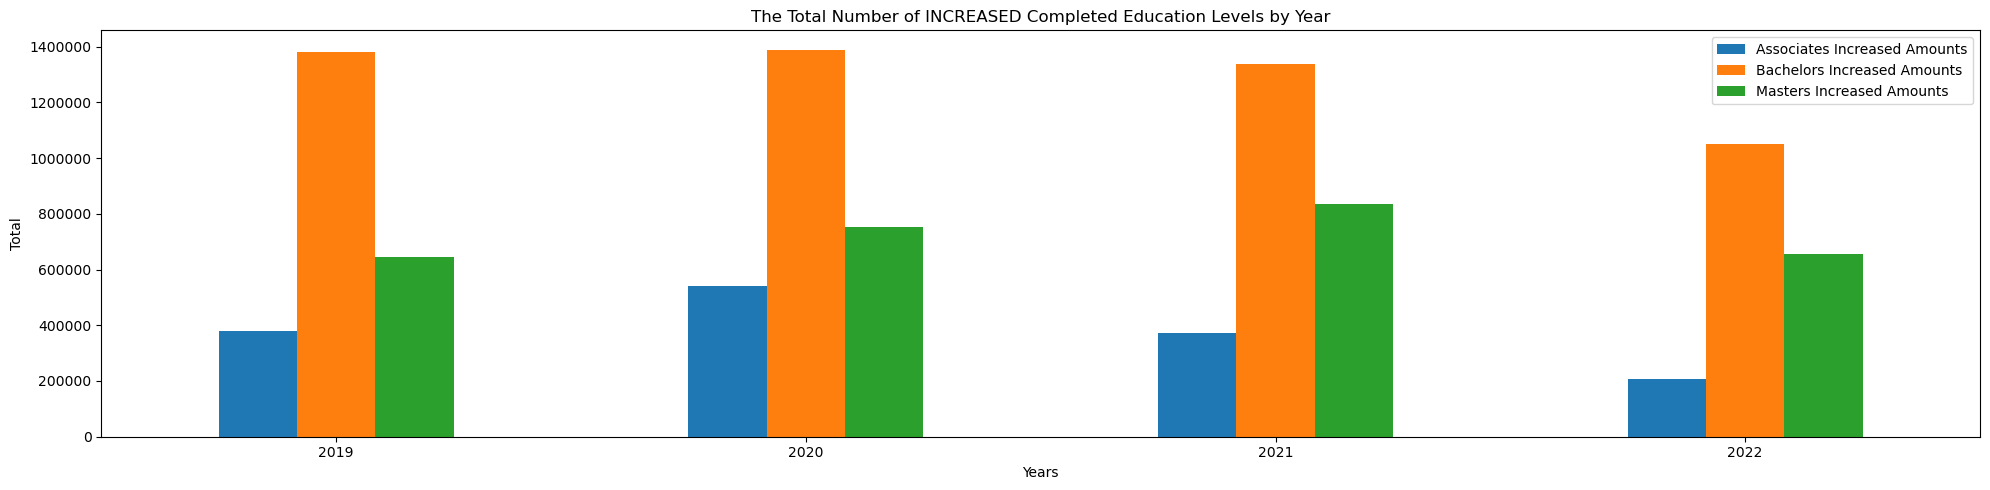

In [537]:
# Generate a bar plot showing the average number of persons with each type of education.
three_bar_plot_increase = yearly_increase.plot(kind="bar", figsize=(20,5), rot=360)
three_bar_plot_increase.set_xticklabels(year_range)
plt.title("The Total Number of INCREASED Completed Education Levels by Year")
plt.ylabel("Total")
plt.xlabel("Years")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1, 1))
#plt.show()
plt.tight_layout()
plt.savefig(r"C:\Users\sym0002\EdX_Bootcamp\Project1/Fig4.png")

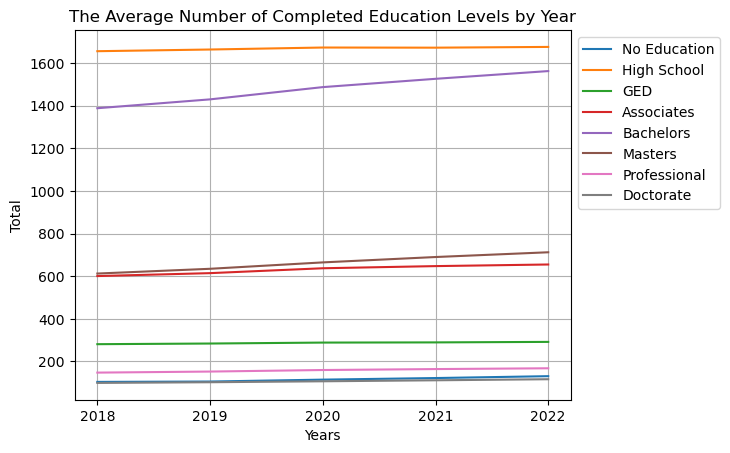

<Figure size 640x480 with 0 Axes>

In [536]:
# Plot a line chart showing the average number of completed education levels by year
plt.plot(average_education.index, average_education['average_no_education'], label='No Education')
plt.plot(average_education.index, average_education['average_high_school'], label='High School')
plt.plot(average_education.index, average_education['average_ged'], label='GED')
plt.plot(average_education.index, average_education['average_associates'], label='Associates')
plt.plot(average_education.index, average_education['average_bachelors'], label='Bachelors')
plt.plot(average_education.index, average_education['average_masters'], label='Masters')
plt.plot(average_education.index, average_education['average_professional'], label='Professional')
plt.plot(average_education.index, average_education['average_doctorate'], label='Doctorate')

# Customize the plot
plt.title('The Average Number of Completed Education Levels by Year')
plt.xlabel('Years')
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.xticks(average_education.index)
plt.show()
plt.savefig("../Project1/Fig2.png")

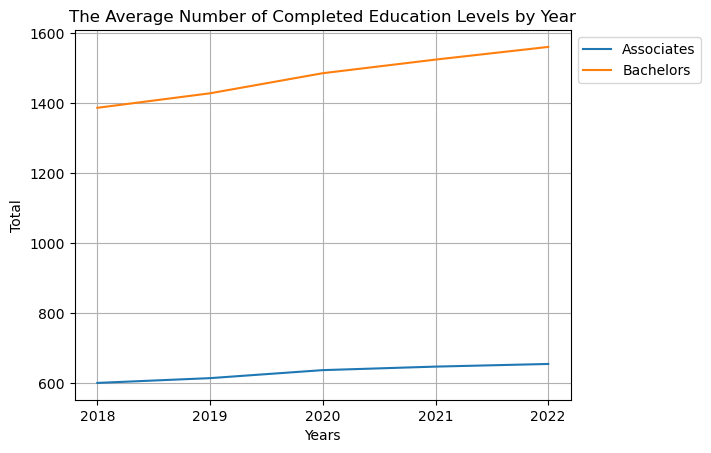

In [495]:
# Plot a line chart showing the average number of completed education levels by year
plt.plot(average_education.index, average_education['average_associates'], label='Associates')
plt.plot(average_education.index, average_education['average_bachelors'], label='Bachelors')

# Customize the plot
plt.title('The Average Number of Completed Education Levels by Year')
plt.xlabel('Years')
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.xticks(average_education.index)
plt.show()

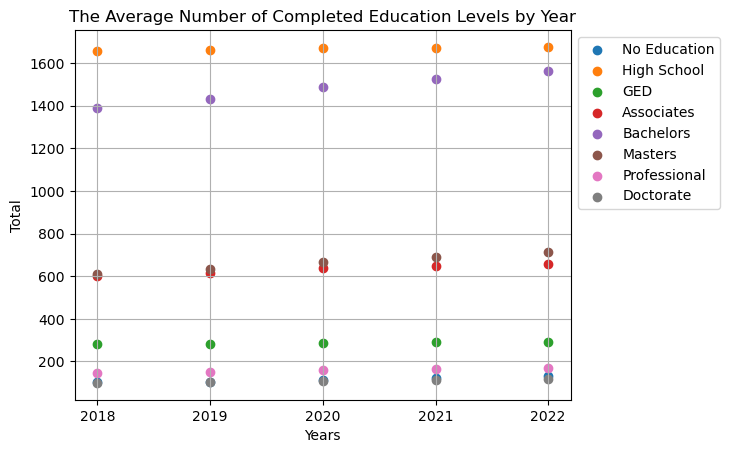

In [492]:
# Plot a scatter plot for the average Number of Completed Education Levels by Year
plt.scatter(average_education.index, average_education['average_no_education'], label='No Education')
plt.scatter(average_education.index, average_education['average_high_school'], label='High School')
plt.scatter(average_education.index, average_education['average_ged'], label='GED')
plt.scatter(average_education.index, average_education['average_associates'], label='Associates')
plt.scatter(average_education.index, average_education['average_bachelors'], label='Bachelors')
plt.scatter(average_education.index, average_education['average_masters'], label='Masters')
plt.scatter(average_education.index, average_education['average_professional'], label='Professional')
plt.scatter(average_education.index, average_education['average_doctorate'], label='Doctorate')

# Customize the plot
plt.title('The Average Number of Completed Education Levels by Year')
plt.xlabel('Years')
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.xticks(average_education.index)
plt.show()

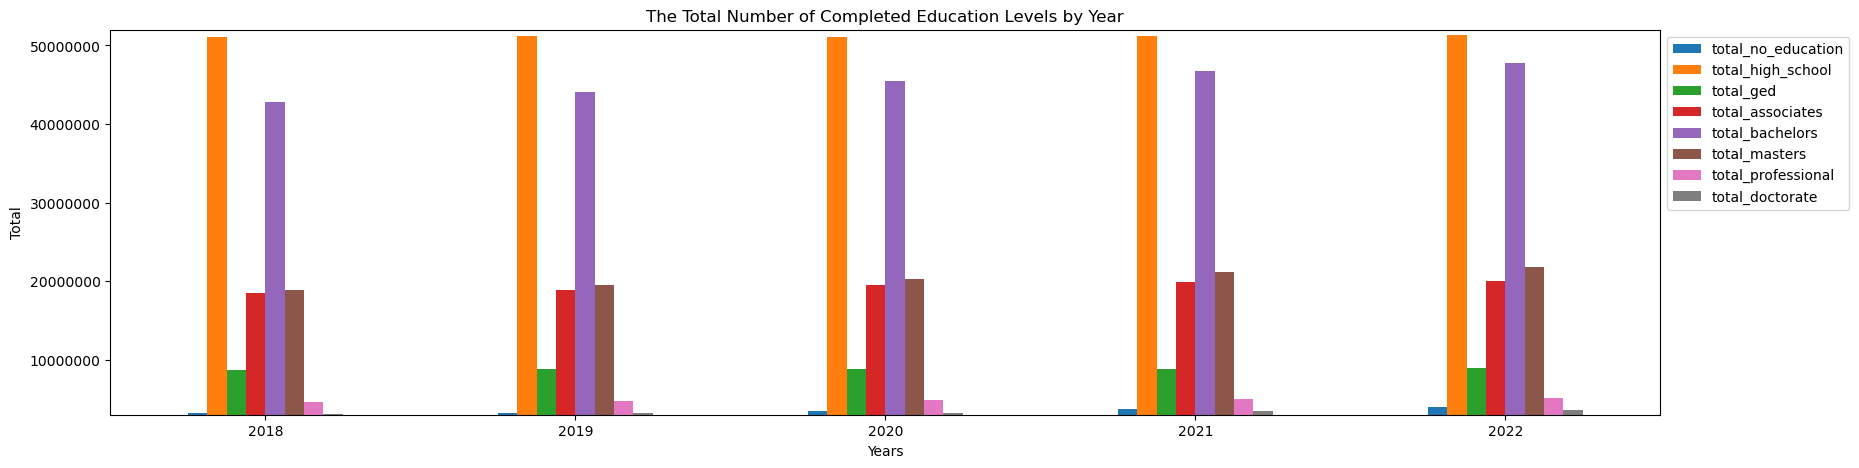

<Figure size 640x480 with 0 Axes>

In [475]:
# Generate a bar plot showing the total number of persons with each type of education.
multi_bar_plot = total_education_main_clean.plot(kind="bar", figsize=(20,5), rot=360)
multi_bar_plot.set_xticklabels(years)
plt.title("The Total Number of Completed Education Levels by Year")
plt.ylabel("Total")
plt.xlabel("Years")
plt.ylim(3000000, 52000000)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
plt.tight_layout()

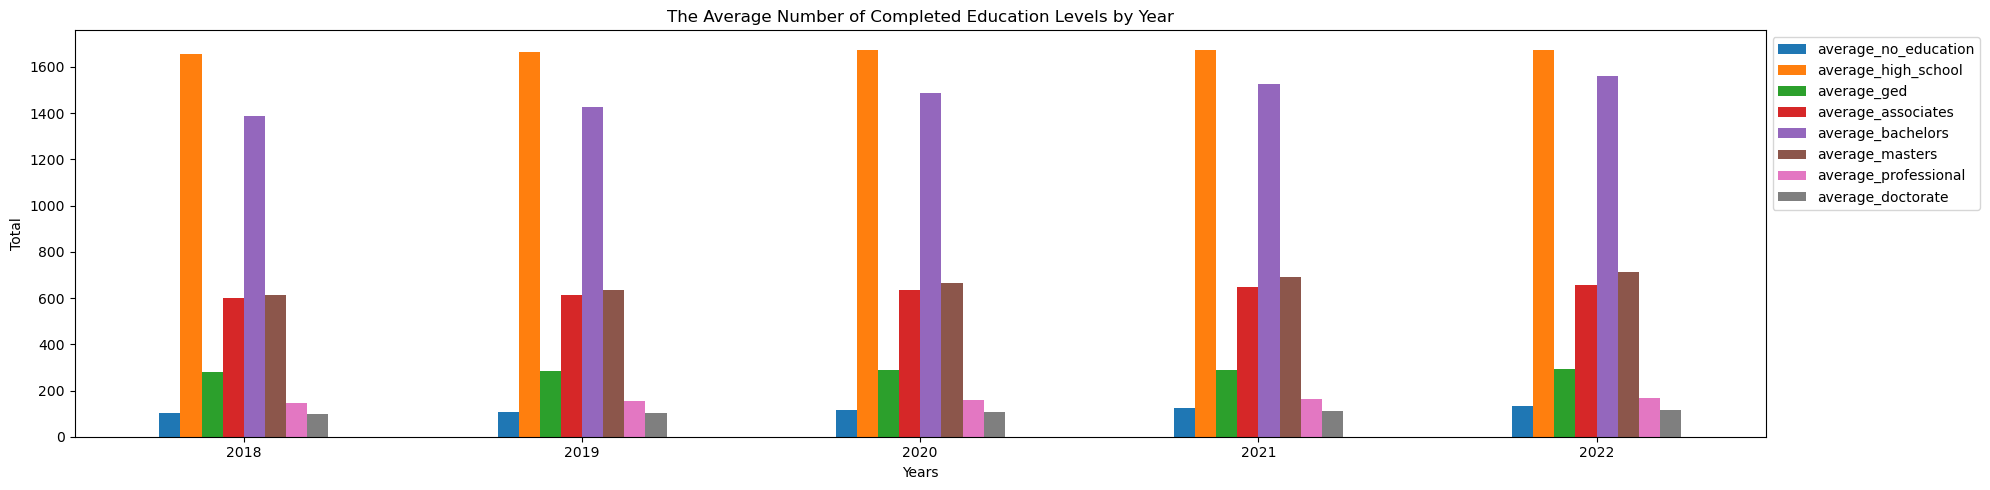

In [535]:
# Generate a bar plot showing the average number of persons with each type of education.
multi_bar_plot_avg = average_education_main_clean.plot(kind="bar", figsize=(20,5), rot=360)
multi_bar_plot_avg.set_xticklabels(years)
plt.title("The Average Number of Completed Education Levels by Year")
plt.ylabel("Total")
plt.xlabel("Years")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1, 1))
#plt.show()
plt.tight_layout()
plt.savefig(r"C:\Users\sym0002\EdX_Bootcamp\Project1/Fig1.png")

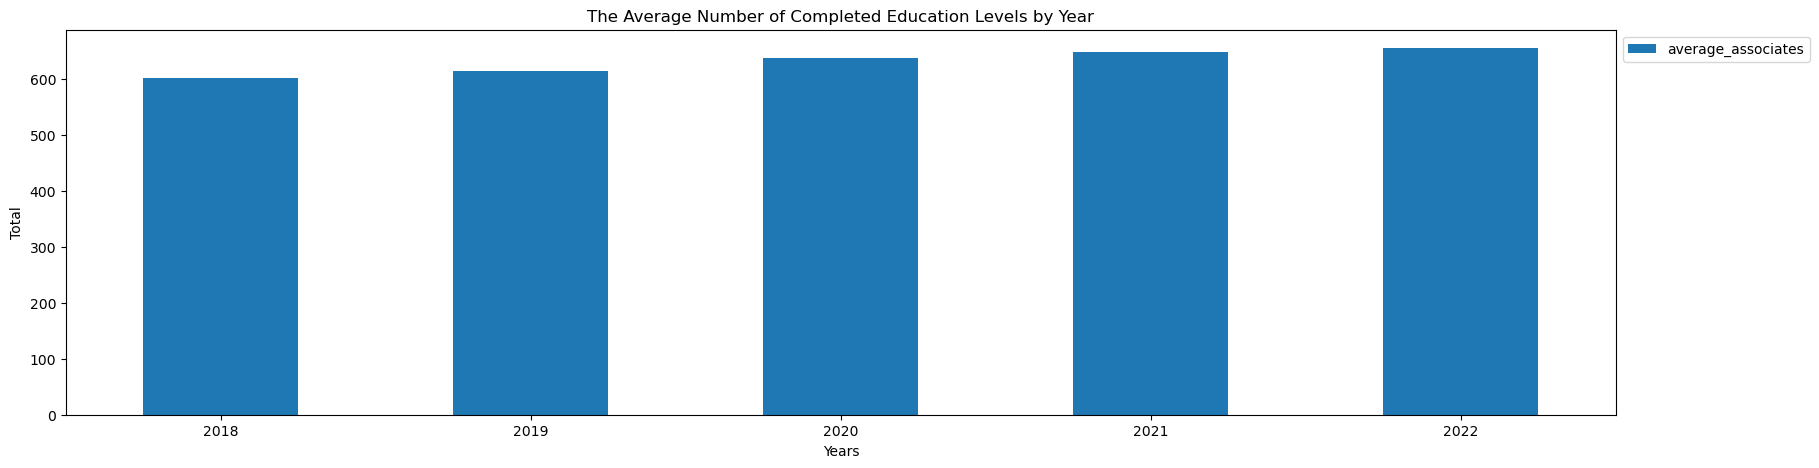

<Figure size 640x480 with 0 Axes>

In [498]:
# Generate a bar plot showing the average number of persons with no education.
associates_education_data_avg = average_education_main_clean['average_associates']
associates_education_bar_plot = associates_education_data_avg.plot(kind="bar", figsize=(20,5), rot=360)
associates_education_bar_plot.set_xticklabels(years)
plt.title("The Average Number of Completed Education Levels by Year")
plt.ylabel("Total")
plt.xlabel("Years")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
plt.tight_layout()

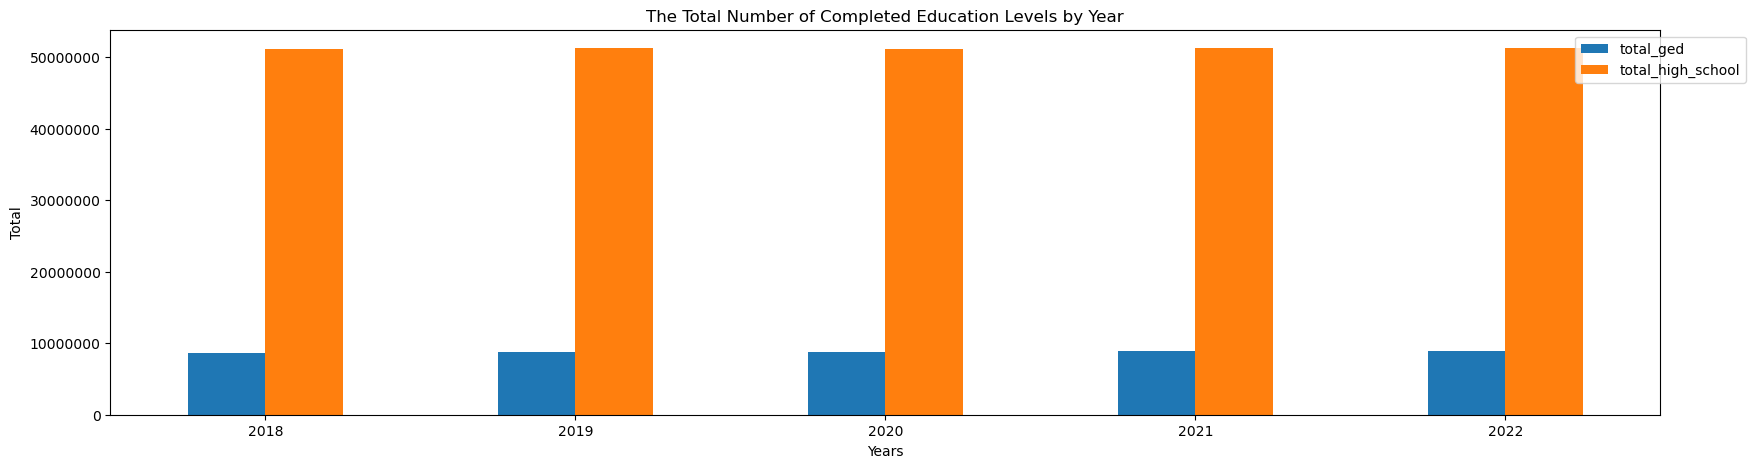

<Figure size 640x480 with 0 Axes>

In [532]:
# Generate a bar plot showing 2 totals together.
columns_to_plot = ['total_ged', 'total_high_school']
subset_data = total_education_main_clean[columns_to_plot]

no_education_bar_plot = subset_data.plot(kind="bar", figsize=(20,5), rot=360)
no_education_bar_plot.set_xticklabels(years)
plt.title("The Total Number of Completed Education Levels by Year")
plt.ylabel("Total")
plt.xlabel("Years")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1))
plt.show()
plt.tight_layout()